## STEP 1 - Importing libraries

In [219]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## STEP 2 - Importing Datasets

In [220]:
import os
os.chdir("C://Users//KOMAL//Desktop//data//loan prediction(approval)")

In [221]:
loan=pd.read_csv('train.csv')
test_loan=pd.read_csv("test.csv")

In [222]:
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [223]:
master= pd.concat([loan,test_loan])

In [224]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 76.6+ KB


## STEP 3 - Data cleaning

In [225]:
master.duplicated().sum()

0

In [226]:
master

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,NaN
363,LP002975,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,NaN
364,LP002980,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,NaN,Semiurban,NaN
365,LP002986,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,NaN


In [227]:
master.isna().sum().sum()

600

In [228]:
master.isna().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [229]:
# Approaching married 1st because it has lowest nas
master[master.Married.isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
435,LP002393,Female,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y


In [230]:
master.Married.value_counts()

Yes    631
No     347
Name: Married, dtype: int64

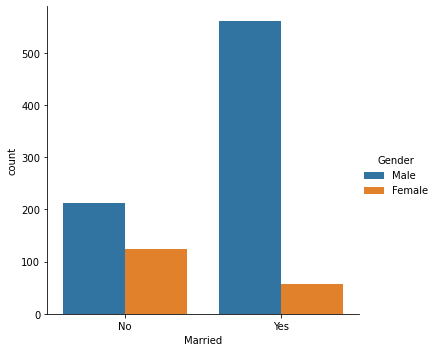

In [231]:
sns.catplot(x='Married',hue='Gender', kind='count', data=master)

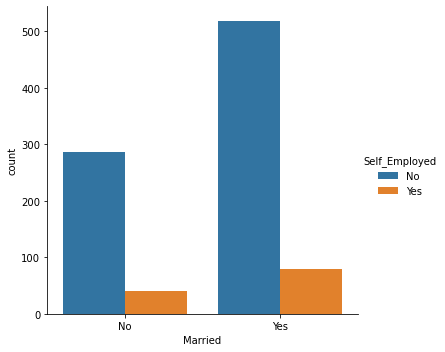

In [232]:
sns.catplot(x='Married',hue='Self_Employed', kind='count', data=master)

In [233]:
master.loc[[104,228],'Married']='Yes'

In [234]:
master.loc[435,"Married"]='No'

In [235]:
master.isna().sum()

Loan_ID                0
Gender                24
Married                0
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [236]:
master[master.Dependents.isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
102,LP001350,Male,Yes,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
104,LP001357,Male,Yes,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
120,LP001426,Male,Yes,NaN,Graduate,No,5667,2667.0,180.0,360.0,1.0,Rural,Y
226,LP001754,Male,Yes,NaN,Not Graduate,Yes,4735,0.0,138.0,360.0,1.0,Urban,N
228,LP001760,Male,Yes,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
293,LP001945,Female,No,NaN,Graduate,No,5417,0.0,143.0,480.0,0.0,Urban,N
301,LP001972,Male,Yes,NaN,Not Graduate,No,2875,1750.0,105.0,360.0,1.0,Semiurban,Y
332,LP002100,Male,No,NaN,Graduate,No,2833,0.0,71.0,360.0,1.0,Urban,Y
335,LP002106,Male,Yes,NaN,Graduate,Yes,5503,4490.0,70.0,NaN,1.0,Semiurban,Y
346,LP002130,Male,Yes,NaN,Not Graduate,No,3523,3230.0,152.0,360.0,0.0,Rural,N


In [237]:
master.Dependents.value_counts()

0     545
2     160
1     160
3+     91
Name: Dependents, dtype: int64

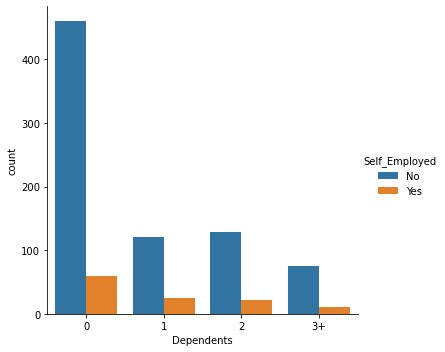

In [238]:
sns.catplot(x='Dependents',hue='Self_Employed', kind='count', data=master)

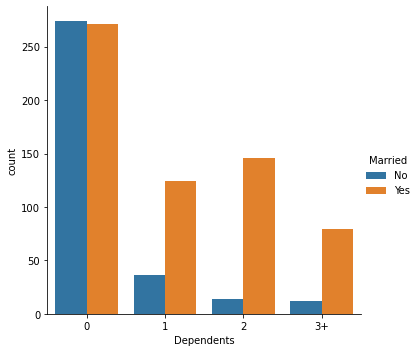

In [239]:
sns.catplot(x='Dependents',hue='Married', kind='count', data=master)

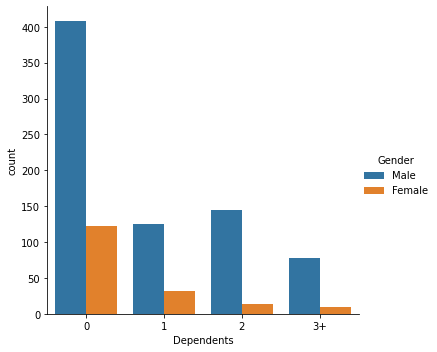

In [240]:
sns.catplot(x='Dependents',hue='Gender', kind='count', data=master)

In [241]:
# going with mode as i didn't find any pattern
master.Dependents.fillna(0, inplace=True)

In [242]:
master.Dependents[master.Dependents=="3+"]=int(4)

E:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [243]:
master.Dependents.value_counts()

0    545
2    160
1    160
4     91
0     25
Name: Dependents, dtype: int64

In [244]:
master["Dependents"] = master["Dependents"].astype(str).astype(int)

In [245]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            981 non-null    object 
 3   Dependents         981 non-null    int32  
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int32(1), int64(1), object(7)
memory usage: 92.6+ KB


In [246]:
master.isna().sum()

Loan_ID                0
Gender                24
Married                0
Dependents             0
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [247]:
master[master.Gender.isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
126,LP001448,NaN,Yes,4,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
171,LP001585,NaN,Yes,4,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
188,LP001644,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y
314,LP002024,NaN,Yes,0,Graduate,No,2473,1843.0,159.0,360.0,1.0,Rural,N
334,LP002103,NaN,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,Y
460,LP002478,NaN,Yes,0,Graduate,Yes,2083,4083.0,160.0,360.0,NaN,Semiurban,Y
467,LP002501,NaN,Yes,0,Graduate,No,16692,0.0,110.0,360.0,1.0,Semiurban,Y
477,LP002530,NaN,Yes,2,Graduate,No,2873,1872.0,132.0,360.0,0.0,Semiurban,N
507,LP002625,NaN,No,0,Graduate,No,3583,0.0,96.0,360.0,1.0,Urban,N


In [248]:
master.Gender.value_counts()

Male      775
Female    182
Name: Gender, dtype: int64

In [249]:
master.Gender.fillna('Male', inplace=True)

In [250]:
master.isna().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [251]:
master.Loan_Amount_Term.value_counts()

360.0    823
180.0     66
480.0     23
300.0     20
240.0      8
84.0       7
120.0      4
36.0       3
60.0       3
12.0       2
350.0      1
6.0        1
Name: Loan_Amount_Term, dtype: int64

In [252]:
master[master.Loan_Amount_Term.isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
19,LP001041,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
36,LP001109,Male,Yes,0,Graduate,No,1828,1330.0,100.0,NaN,0.0,Urban,N
44,LP001136,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Urban,Y
45,LP001137,Female,No,0,Graduate,No,3410,0.0,88.0,NaN,1.0,Urban,Y
73,LP001250,Male,Yes,4,Not Graduate,No,4755,0.0,95.0,NaN,0.0,Semiurban,N
112,LP001391,Male,Yes,0,Not Graduate,No,3572,4114.0,152.0,NaN,0.0,Rural,N
165,LP001574,Male,Yes,0,Graduate,No,3707,3166.0,182.0,NaN,1.0,Rural,Y
197,LP001669,Female,No,0,Not Graduate,No,1907,2365.0,120.0,NaN,1.0,Urban,Y
223,LP001749,Male,Yes,0,Graduate,No,7578,1010.0,175.0,NaN,1.0,Semiurban,Y
232,LP001770,Male,No,0,Not Graduate,No,3189,2598.0,120.0,NaN,1.0,Rural,Y


In [253]:
master[master.Loan_Amount_Term==6.0]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
325,LP002802,Male,No,0,Graduate,No,2875,2416.0,95.0,6.0,0.0,Semiurban,NaN


In [254]:
master.Loan_Amount_Term.fillna(360.0, inplace=True)

In [255]:
master.isna().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term       0
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [256]:
master.Credit_History.value_counts()

1.0    754
0.0    148
Name: Credit_History, dtype: int64

In [257]:
master[master.Credit_History.isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
16,LP001034,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y
24,LP001052,Male,Yes,1,Graduate,NaN,3717,2925.0,151.0,360.0,NaN,Semiurban,N
30,LP001091,Male,Yes,1,Graduate,NaN,4166,3369.0,201.0,360.0,NaN,Urban,N
42,LP001123,Male,Yes,0,Graduate,No,2400,0.0,75.0,360.0,NaN,Urban,Y
79,LP001264,Male,Yes,4,Not Graduate,Yes,3333,2166.0,130.0,360.0,NaN,Semiurban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,LP002853,Female,No,0,Not Graduate,No,3015,2000.0,145.0,360.0,NaN,Urban,NaN
351,LP002901,Male,No,0,Graduate,No,2283,15000.0,106.0,360.0,NaN,Rural,NaN
358,LP002954,Male,Yes,2,Not Graduate,No,3132,0.0,76.0,360.0,NaN,Rural,NaN
360,LP002965,Female,Yes,0,Graduate,No,8550,4255.0,96.0,360.0,NaN,Urban,NaN


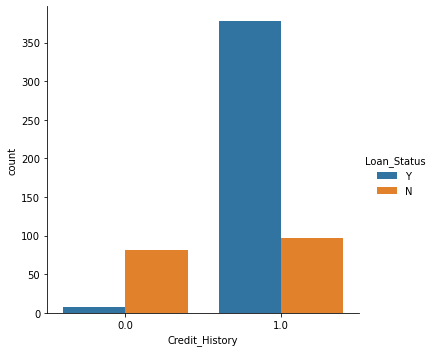

In [258]:
sns.catplot(x="Credit_History",hue="Loan_Status", kind='count', data=master)

In [259]:
master.Credit_History.fillna(1, inplace=True)

In [260]:
master.Credit_History.value_counts()

1.0    833
0.0    148
Name: Credit_History, dtype: int64

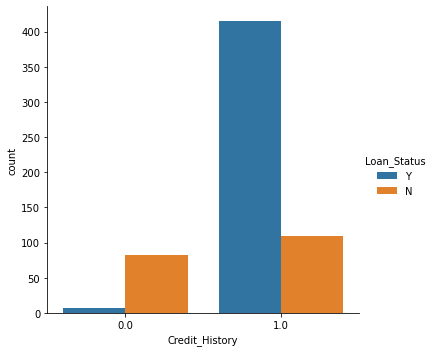

In [261]:
sns.catplot(x="Credit_History",hue="Loan_Status", kind='count', data=master)

In [262]:
master.isna().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          367
dtype: int64

In [263]:
master.Self_Employed.value_counts()

No     807
Yes    119
Name: Self_Employed, dtype: int64

In [264]:
master.Self_Employed.fillna("NO", inplace=True)

In [265]:
master.isna().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          367
dtype: int64

In [266]:
master[master.LoanAmount.isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
35,LP001106,Male,Yes,0,Graduate,No,2275,2067.0,NaN,360.0,1.0,Urban,Y
63,LP001213,Male,Yes,1,Graduate,No,4945,0.0,NaN,360.0,0.0,Rural,N
81,LP001266,Male,Yes,1,Graduate,Yes,2395,0.0,NaN,360.0,1.0,Semiurban,Y
95,LP001326,Male,No,0,Graduate,NO,6782,0.0,NaN,360.0,1.0,Urban,N
102,LP001350,Male,Yes,0,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
103,LP001356,Male,Yes,0,Graduate,No,4652,3583.0,NaN,360.0,1.0,Semiurban,Y
113,LP001392,Female,No,1,Graduate,Yes,7451,0.0,NaN,360.0,1.0,Semiurban,Y
127,LP001449,Male,No,0,Graduate,No,3865,1640.0,NaN,360.0,1.0,Rural,Y
202,LP001682,Male,Yes,4,Not Graduate,No,3992,0.0,NaN,180.0,1.0,Urban,N


In [267]:
data1=master[["ApplicantIncome","CoapplicantIncome","Loan_Amount_Term","LoanAmount"]]

In [268]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp=IterativeImputer(max_iter=100,random_state=1)
model=imp.fit_transform(data1)
model

array([[5849.        ,    0.        ,  360.        ,  137.51899876],
       [4583.        , 1508.        ,  360.        ,  128.        ],
       [3000.        ,    0.        ,  360.        ,   66.        ],
       ...,
       [3250.        , 1993.        ,  360.        ,  126.        ],
       [5000.        , 2393.        ,  360.        ,  158.        ],
       [9200.        ,    0.        ,  180.        ,   98.        ]])

In [269]:
df_ser=np.array([])
for i in range(0,981):
  df_ser=np.append(df_ser,model[i,3])

In [270]:
df_ser

array([137.51899876, 128.        ,  66.        , 120.        ,
       141.        , 267.        ,  95.        , 158.        ,
       168.        , 349.        ,  70.        , 109.        ,
       200.        , 114.        ,  17.        , 125.        ,
       100.        ,  76.        , 133.        , 115.        ,
       104.        , 315.        , 116.        , 112.        ,
       151.        , 191.        , 122.        , 110.        ,
        35.        , 120.        , 201.        ,  74.        ,
       106.        , 114.        , 320.        , 123.79578982,
       100.        , 144.        , 184.        , 110.        ,
        80.        ,  47.        ,  75.        , 134.        ,
        96.        ,  88.        ,  44.        , 144.        ,
       120.        , 144.        , 100.        , 120.        ,
       112.        , 134.        , 286.        ,  97.        ,
        96.        , 135.        , 180.        , 144.        ,
       120.        ,  99.        , 165.        , 130.43

In [271]:
master["LoanAmount"]=df_ser

In [272]:
master

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,137.518999,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,4,Not Graduate,Yes,4009,1777.0,113.000000,360.0,1.0,Urban,NaN
363,LP002975,Male,Yes,0,Graduate,No,4158,709.0,115.000000,360.0,1.0,Urban,NaN
364,LP002980,Male,No,0,Graduate,No,3250,1993.0,126.000000,360.0,1.0,Semiurban,NaN
365,LP002986,Male,Yes,0,Graduate,No,5000,2393.0,158.000000,360.0,1.0,Rural,NaN


In [273]:
master.isna().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          367
dtype: int64

In [274]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             981 non-null    object 
 2   Married            981 non-null    object 
 3   Dependents         981 non-null    int32  
 4   Education          981 non-null    object 
 5   Self_Employed      981 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         981 non-null    float64
 9   Loan_Amount_Term   981 non-null    float64
 10  Credit_History     981 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int32(1), int64(1), object(7)
memory usage: 92.6+ KB


In [275]:
df_train=master[master.Loan_Status.isna()==False]

In [276]:
df_test=master[master.Loan_Status.isna()]

## STEP 4 - Model Trianing

In [277]:
df_train=df_train.drop("Loan_ID", axis=1)

In [278]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int32(1), int64(1), object(6)
memory usage: 45.6+ KB


In [279]:
X=pd.get_dummies(df_train, drop_first=True )

In [280]:
X

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,0,5849,0.0,137.518999,360.0,1.0,1,0,0,1,0,0,1,1
1,1,4583,1508.0,128.000000,360.0,1.0,1,1,0,1,0,0,0,0
2,0,3000,0.0,66.000000,360.0,1.0,1,1,0,0,1,0,1,1
3,0,2583,2358.0,120.000000,360.0,1.0,1,1,1,1,0,0,1,1
4,0,6000,0.0,141.000000,360.0,1.0,1,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,2900,0.0,71.000000,360.0,1.0,0,0,0,1,0,0,0,1
610,4,4106,0.0,40.000000,180.0,1.0,1,1,0,1,0,0,0,1
611,1,8072,240.0,253.000000,360.0,1.0,1,1,0,1,0,0,1,1
612,2,7583,0.0,187.000000,360.0,1.0,1,1,0,1,0,0,1,1


In [281]:
X.Loan_Status_Y.value_counts()

1    422
0    192
Name: Loan_Status_Y, dtype: int64

In [282]:
df_x=X.drop("Loan_Status_Y", axis=1)

In [283]:
df_y=X.Loan_Status_Y

In [284]:
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(df_x,df_y, test_size=0.1)

In [285]:
from sklearn.tree import DecisionTreeClassifier  
from sklearn.model_selection import GridSearchCV
params = {'max_depth':[9,11,13,15,17,21]}


regressor = DecisionTreeClassifier()


model = GridSearchCV(regressor, params, cv=5)
model.fit(X_train,y_train)

model

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [9, 11, 13, 15, 17, 21]})

In [286]:
model.cv_results_

{'mean_fit_time': array([0.0150002 , 0.01600027, 0.01600032, 0.01450028, 0.01450014,
        0.01400023]),
 'std_fit_time': array([1.16800773e-07, 1.22475344e-03, 1.22481184e-03, 9.99999051e-04,
        1.00004673e-03, 1.22469504e-03]),
 'mean_score_time': array([0.0065002 , 0.00750008, 0.00700011, 0.00750008, 0.00550022,
        0.00700016]),
 'std_score_time': array([1.22471451e-03, 1.90734863e-07, 1.00011827e-03, 1.90734863e-07,
        1.00009442e-03, 9.99903683e-04]),
 'param_max_depth': masked_array(data=[9, 11, 13, 15, 17, 21],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 9},
  {'max_depth': 11},
  {'max_depth': 13},
  {'max_depth': 15},
  {'max_depth': 17},
  {'max_depth': 21}],
 'split0_test_score': array([0.74774775, 0.67567568, 0.69369369, 0.7027027 , 0.67567568,
        0.66666667]),
 'split1_test_score': array([0.83783784, 0.83783784, 0.78378378, 0.81081081, 0.81981982,
        

In [287]:
print(model.best_params_,model.best_score_,model.best_estimator_)

{'max_depth': 9} 0.7734807534807534 DecisionTreeClassifier(max_depth=9)


In [291]:
from imblearn.under_sampling import TomekLinks
tl = TomekLinks()
X_tl, y_tl = tl.fit_sample(df_x,df_y)

In [310]:
from sklearn.ensemble import RandomForestClassifier

random_forest=RandomForestClassifier(n_estimators=5000, max_depth=10)

In [311]:
random_forest.fit(X_tl,y_tl)

RandomForestClassifier(max_depth=10, n_estimators=5000)

In [312]:
y_pred=random_forest.predict(X_test)

In [313]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

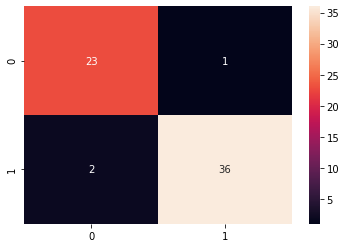

In [314]:
sns.heatmap(cm, annot=True)

In [315]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94        24
           1       0.97      0.95      0.96        38

    accuracy                           0.95        62
   macro avg       0.95      0.95      0.95        62
weighted avg       0.95      0.95      0.95        62



In [316]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 367 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             367 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         367 non-null    int32  
 4   Education          367 non-null    object 
 5   Self_Employed      367 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    float64
 8   LoanAmount         367 non-null    float64
 9   Loan_Amount_Term   367 non-null    float64
 10  Credit_History     367 non-null    float64
 11  Property_Area      367 non-null    object 
 12  Loan_Status        367 non-null    uint8  
dtypes: float64(4), int32(1), int64(1), object(6), uint8(1)
memory usage: 27.6+ KB


In [317]:
Y=df_test.drop(["Loan_ID","Loan_Status"], axis=1)

In [318]:
Y=pd.get_dummies(Y, drop_first=True)

In [319]:
Y

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0,5720,0.0,110.0,360.0,1.0,1,1,0,1,0,0,1
1,1,3076,1500.0,126.0,360.0,1.0,1,1,0,1,0,0,1
2,2,5000,1800.0,208.0,360.0,1.0,1,1,0,1,0,0,1
3,2,2340,2546.0,100.0,360.0,1.0,1,1,0,1,0,0,1
4,0,3276,0.0,78.0,360.0,1.0,1,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,4,4009,1777.0,113.0,360.0,1.0,1,1,1,0,1,0,1
363,0,4158,709.0,115.0,360.0,1.0,1,1,0,1,0,0,1
364,0,3250,1993.0,126.0,360.0,1.0,1,0,0,1,0,1,0
365,0,5000,2393.0,158.0,360.0,1.0,1,1,0,1,0,0,0


In [320]:
y_sub=random_forest.predict(Y)

In [321]:
y_sub

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [322]:
df_test["Loan_Status"]=y_sub

E:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [323]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 367 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             367 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         367 non-null    int32  
 4   Education          367 non-null    object 
 5   Self_Employed      367 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    float64
 8   LoanAmount         367 non-null    float64
 9   Loan_Amount_Term   367 non-null    float64
 10  Credit_History     367 non-null    float64
 11  Property_Area      367 non-null    object 
 12  Loan_Status        367 non-null    uint8  
dtypes: float64(4), int32(1), int64(1), object(6), uint8(1)
memory usage: 27.6+ KB


In [324]:
sub=df_test.copy()

In [325]:
sub.Loan_Status[sub.Loan_Status==1]="Y"
sub.Loan_Status[sub.Loan_Status==0]="N"

E:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [326]:
submission=sub[["Loan_ID","Loan_Status"]]

In [327]:
submission.to_csv("last try.csv", index=False)